In [1]:
pwd

'D:\\movie'

In [5]:
import numpy as np
import pandas as pd

In [7]:
df=pd.read_csv('movies.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659 entries, 0 to 5658
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 442.2+ KB


## 1.How many movies are in the dataset?¶

In [10]:
total_movies = len(df)
total_movies

5659

## 2.What is the average duration of movies,average number of votes per movie?

In [14]:
average_duration = df['Duration'].mean()
average_votes = df['Votes'].mean()
average_duration = round(average_duration)
average_votes = round(average_votes)
average_duration,average_votes

(133, 2698)

In [16]:
round(df['Duration'].mean()), round(df['Votes'].mean())

(133, 2698)

 ## 3.Which movie has the highest rating?

In [20]:
highest_rated_movie = df.loc[df['Rating'].idxmax()]
highest_rated_movie


Name            Love Qubool Hai
Year                       2020
Duration                     94
Genre            Drama, Romance
Rating                     10.0
Votes                         5
Director        Saif Ali Sayeed
Actor 1               Ahaan Jha
Actor 2          Mahesh Narayan
Actor 3     Rajasree Rajakumari
Name: 3146, dtype: object

In [21]:
highest_rated_movie = df.loc[df['Rating'].idxmax(), ['Name', 'Rating']]
highest_rated_movie_name = highest_rated_movie['Name']
highest_rated_movie_rating = highest_rated_movie['Rating']

highest_rated_movie_name, highest_rated_movie_rating

('Love Qubool Hai', 10.0)

## 4.What is the most common genre?

In [25]:
most_common_genre = df['Genre'].value_counts().idxmax()
print(most_common_genre)


Drama


## 5.How many movies were released in the year 2000?

In [28]:
movies_2000 = df[df['Year'] == 2000].shape[0]
movies_2000


83

## 6.What is the distribution of movie durations? (Histogram)

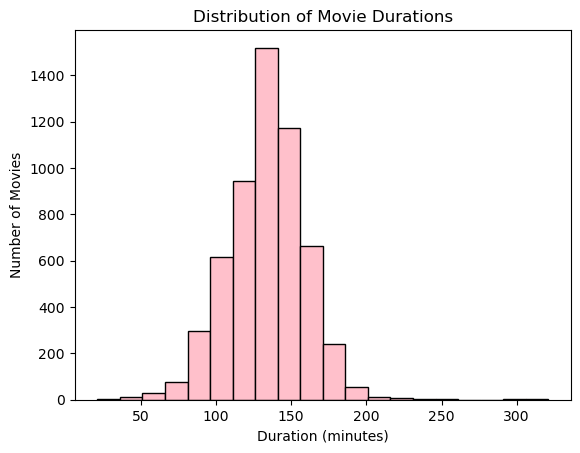

In [31]:
import matplotlib.pyplot as plt

plt.hist(df['Duration'], bins=20, edgecolor='black',color='pink')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()


## 7.How many unique directors are there?

In [33]:
unique_directors = df['Director'].nunique()
unique_directors


2431

## 8.Plot top ten director who has the most number of movie

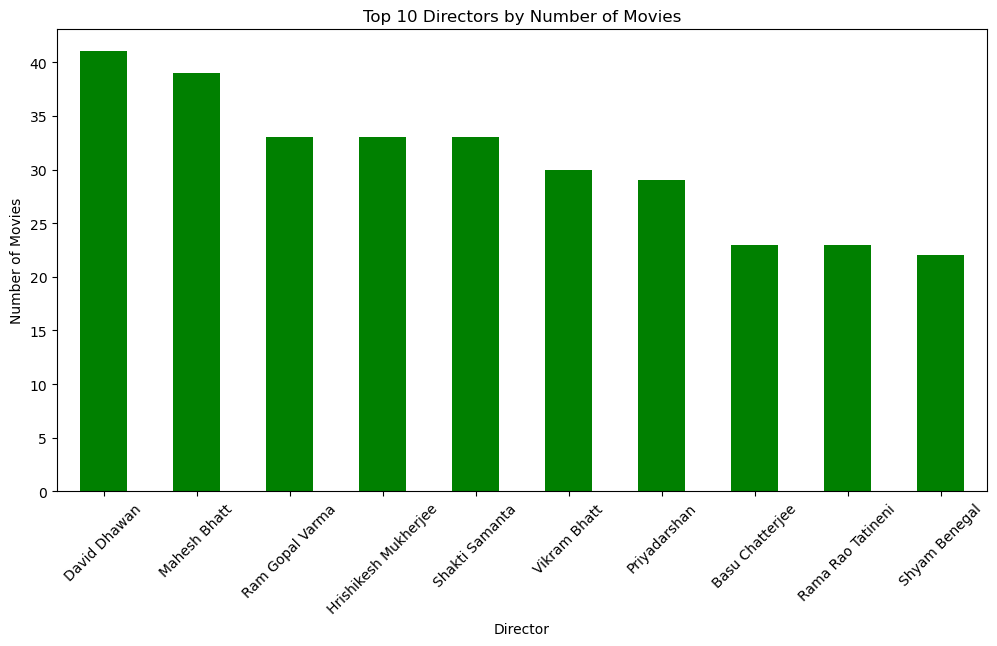

In [35]:
director_counts = df['Director'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
director_counts.plot(kind='bar',color='g')
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

## 9.How many movies belong to the 'Comedy' genre?

In [37]:
comedy_movies = df[df['Genre'].str.contains('Comedy')].shape[0]
comedy_movies


1344

In [38]:
action_movies = df[df['Genre'].str.contains('Action')].shape[0]
action_movies


1686

In [39]:
Thiller_movies = df[df['Genre'].str.contains('Thriller')].shape[0]
Thiller_movies


679

In [40]:
Thiller_movies = df[df['Genre'].str.contains('Horror')].shape[0]
Thiller_movies


202

In [41]:
drama_movies = df[df['Genre'].str.contains('Drama')].shape[0]
drama_movies

3796

In [42]:
thriller_movies = df[df['Genre'].str.contains('Sci-Fi')].shape[0]
thriller_movies

32

In [43]:
thriller_movies = df[df['Genre'].str.contains('War')].shape[0]
thriller_movies

33

## 10.What is the average rating of 'Drama','Action','Thriller' movies?

In [45]:
average_drama_rating = df[df['Genre'].str.contains('Drama')]['Rating'].mean()

average_action_rating = df[df['Genre'].str.contains('Action')]['Rating'].mean()

average_thriller_rating = df[df['Genre'].str.contains('Thriller')]['Rating'].mean()

average_drama_rating,average_action_rating,average_thriller_rating

(6.056743940990517, 5.520462633451957, 5.630044182621503)

In [46]:
round(df[df['Genre'].str.contains('Drama')]['Rating'].mean()),round(df[df['Genre'].str.contains('Action')]['Rating'].mean()),round( df[df['Genre'].str.contains('Thriller')]['Rating'].mean())

(6, 6, 6)

## 11.Plot the number of movies released each year.

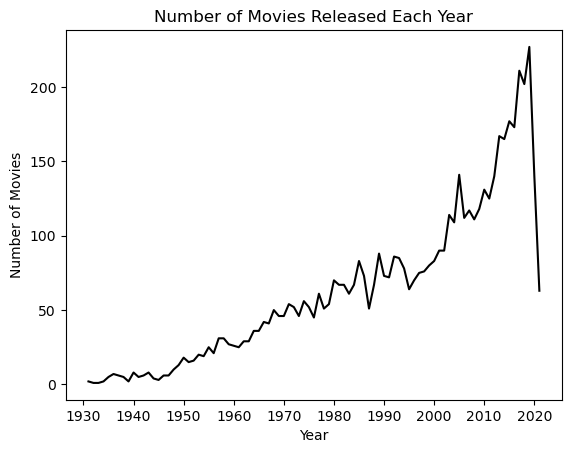

In [48]:
df['Decade'] = (df['Year'] // 10) * 10
movies_per_decade = df.groupby('Decade').size()

movies_per_year = df['Year'].value_counts().sort_index()
plt.plot(movies_per_year.index, movies_per_year.values,color='k')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(movies_per_decade.index, [f'{decade}' for decade in movies_per_decade.index])

plt.show()

## 12.What is the most common rating?

In [51]:
most_common_rating = df['Rating'].value_counts().idxmax()
print(most_common_rating)


6.8


## 13.Plot the relationship between rating and number of votes.

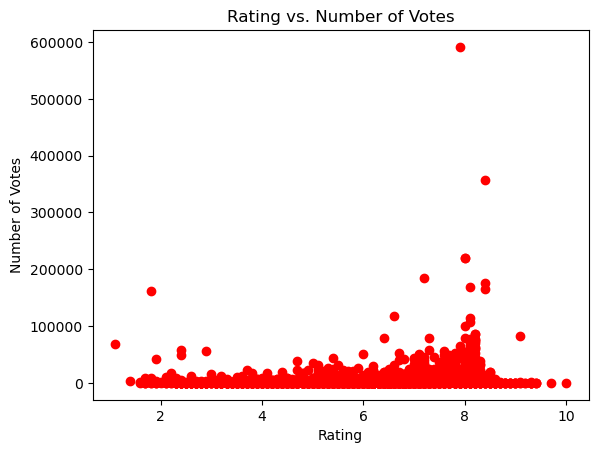

In [54]:
plt.scatter(df['Rating'], df['Votes'],color='r')
plt.title('Rating vs. Number of Votes')
plt.xlabel('Rating')
plt.ylabel('Number of Votes')
plt.show()


## 14.What is the highest-rated 'Horror' movie?

### only  highest rated horror movie

In [57]:
horror_movies = df[df['Genre'] ==  'Horror']
highest_rated_horror_index = horror_movies['Rating'].idxmax()
highest_rated_horror = horror_movies.loc[highest_rated_horror_index,['Name','Rating']]
print(highest_rated_horror)

Name      Aadamkhor
Rating          7.4
Name: 102, dtype: object


## Highest rated horror films with different genres

In [61]:
horror=[]
for x in df['Genre']:
    if 'Horror' in x:
        horror.append(x)
horror_movies=df[df['Genre'].isin(horror)]

horror_movies2=horror_movies[horror_movies['Rating']==horror_movies['Rating'].max()]
horror_movies2

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Decade
5291,Tumbbad,2018,104,"Drama, Fantasy, Horror",8.3,32920,Rahi Anil Barve,Anand Gandhi,Adesh Prasad,Sohum Shah,2010


## 15.How many movies have a rating greater than 8?

In [69]:
highly_rated_movies = df[df['Rating'] > 8].shape[0]
highly_rated_movies


204

## 16.How many movies are longer than 2 hours?

In [73]:
long_movies = df[df['Duration'] > 120].shape[0]
long_movies


4036

## 17.Plot the average movie duration over the years.

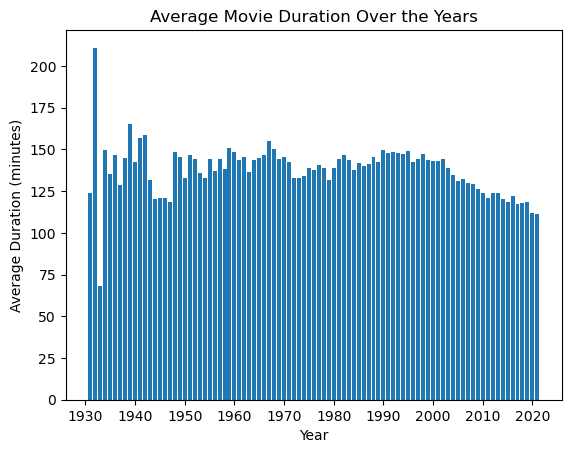

In [77]:
import matplotlib.pyplot as plt
average_duration_per_year = df.groupby('Year')['Duration'].mean()

plt.bar(average_duration_per_year.index, average_duration_per_year.values)
plt.title('Average Movie Duration Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Duration (minutes)')
plt.xticks(movies_per_decade.index, [f'{decade}' for decade in movies_per_decade.index])
plt.show()


## 18.How many movies have more than 1000 votes?

In [79]:
movies_over_1000_votes = df[df['Votes'] > 1000].shape[0]
movies_over_1000_votes


1368

## 19.Plot the distribution of ratings.

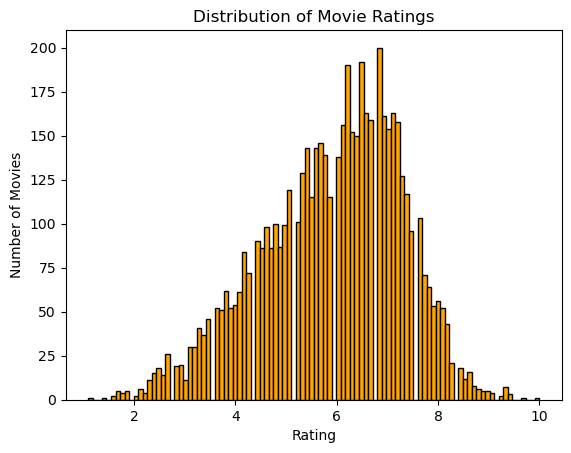

In [82]:
import matplotlib.pyplot as plt
plt.hist(df['Rating'], bins=100, edgecolor='black',color='orange')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.show()


## 20.Plot the number of movies released per decade.

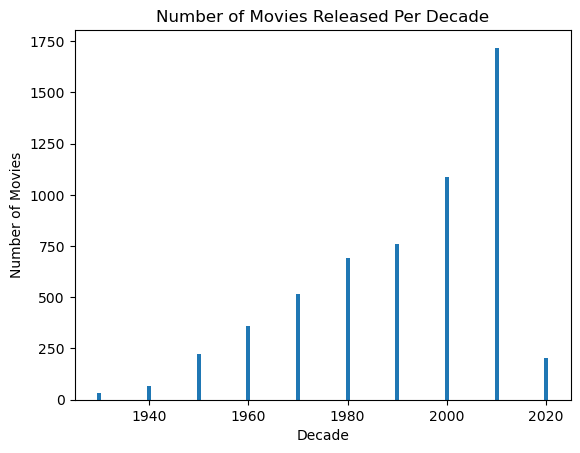

In [85]:
df['Decade'] = (df['Year'] // 10) * 10
movies_per_decade = df['Decade'].value_counts().sort_index()

plt.bar(movies_per_decade.index, movies_per_decade.values)
plt.title('Number of Movies Released Per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.show()

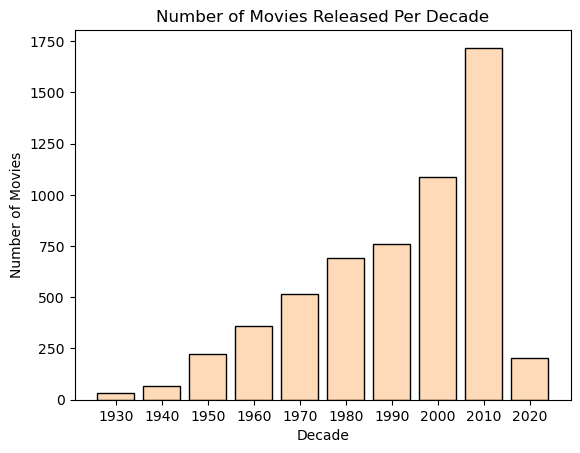

In [86]:
df['Decade'] = (df['Year'] // 10) * 10
movies_per_decade = df['Decade'].value_counts().sort_index()
plt.bar(movies_per_decade.index, movies_per_decade.values,width=8,color='peachpuff',edgecolor='k')
plt.title('Number of Movies Released Per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.xticks(movies_per_decade.index, [f'{decade}' for decade in movies_per_decade.index])
plt.show()

## 21.Plot the average number of votes per year.

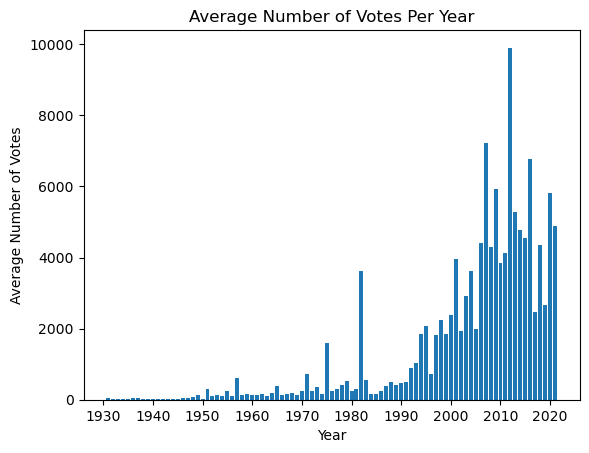

In [88]:
average_votes_per_year = df.groupby('Year')['Votes'].mean()

plt.bar(average_votes_per_year.index, average_votes_per_year.values)
plt.title('Average Number of Votes Per Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Votes')
plt.xticks(movies_per_decade.index, [f'{decade}' for decade in movies_per_decade.index])
plt.show()


## 22.How many movies have a rating between 5 and 7?


In [90]:
movies_5_to_7_rating = df[(df['Rating'] >= 5) & (df['Rating'] <= 7)].shape[0]
movies_5_to_7_rating

3064

## 23 Plot the top 20 average rating for each genre.

In [92]:
average_rating_per_genre = df.groupby('Genre')['Rating'].mean()
average_rating_per_genre

Genre
Action                          5.040588
Action, Adventure               5.611765
Action, Adventure, Biography    7.800000
Action, Adventure, Comedy       5.624324
Action, Adventure, Crime        5.766667
                                  ...   
Thriller, Action                4.300000
Thriller, Musical, Mystery      7.100000
Thriller, Mystery               6.150000
Thriller, Mystery, Family       6.100000
War                             4.333333
Name: Rating, Length: 376, dtype: float64

In [93]:
average_rating_per_genre = df.groupby('Genre')['Rating'].mean()
average_rating_per_genre_sorted = average_rating_per_genre.sort_values(ascending=False)
top_20_genres = average_rating_per_genre_sorted.head(20)
print(top_20_genres)

Genre
History, Romance                   9.40
Documentary, Family, History       9.30
Documentary, Music                 8.90
Documentary, Thriller              8.70
Documentary, Sport                 8.60
Biography, Family                  8.30
Animation, Comedy, Family          8.30
Music, Romance                     8.25
Documentary, Biography, Musical    8.20
Drama, Musical, Sport              8.10
Documentary, History, News         8.00
Fantasy, Musical, Mystery          8.00
Comedy, Musical, Drama             8.00
Documentary, History               7.95
Drama, Family, History             7.90
Drama, Crime, Mystery              7.90
Drama, Fantasy, History            7.90
Crime, Drama, History              7.90
Comedy, Family, Romance            7.80
Action, Musical, War               7.80
Name: Rating, dtype: float64


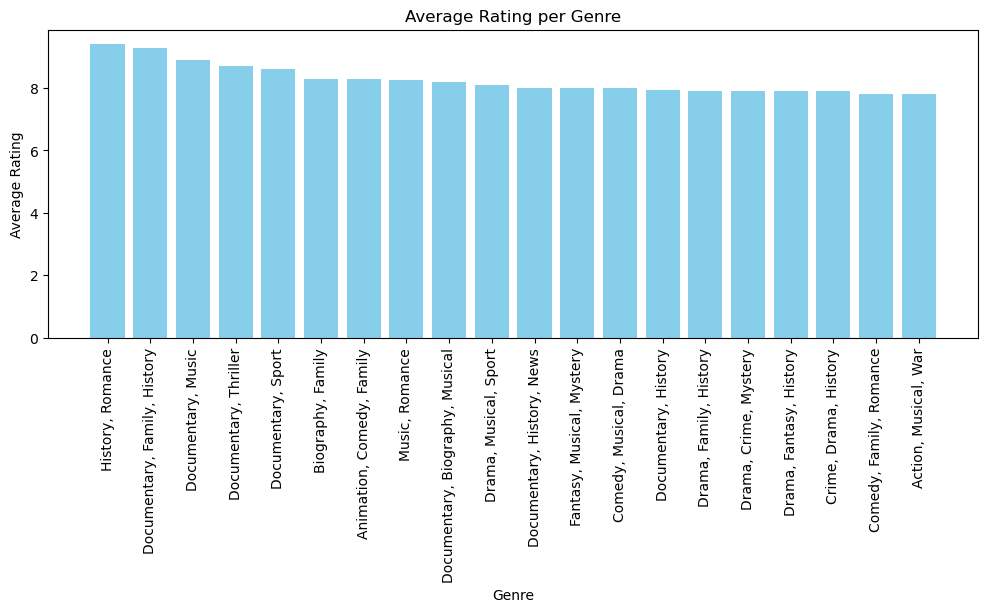

In [94]:
plt.figure(figsize=(12, 4))
plt.bar(top_20_genres.index, top_20_genres,color='skyblue')
plt.title('Average Rating per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90) 
plt.show()

## 24.What is the oldest movie in the dataset?

In [96]:
oldest_movie = df.loc[df['Year'].idxmin()]
oldest_movie


Name                      Draupadi
Year                          1931
Duration                       124
Genre                        Drama
Rating                         5.3
Votes                            6
Director    Bhagwati Prasad Mishra
Actor 1                     Khalil
Actor 2                   Ermeline
Actor 3                      Jillo
Decade                        1930
Name: 1567, dtype: object

## 25.Find the movies of a specific Actor

In [98]:
movies = df[(df['Actor 1'] == 'Jeet') | 
                           (df['Actor 2'] == 'Jeet') | 
                           (df['Actor 3'] == 'Jeet')]

movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Decade
9,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,2010
5167,The Royal Bengal Tiger,2014,110,Thriller,6.9,793,Rajesh Ganguly,Jeet,Abir Chatterjee,Priyanka Sarkar,2010


## 26.What are the top 3 directors who have the highest average rating for their movies?

In [100]:

average_ratings = df.groupby('Director')['Rating'].mean()


sorted_ratings = average_ratings.sort_values(ascending=False)


top_3_directors = sorted_ratings.head(3)

print(top_3_directors)


Director
Saif Ali Sayeed    10.0
Sriram Raja         9.7
Munni Pankaj        9.4
Name: Rating, dtype: float64


## 27.How has the average movie rating changed over the years? Provide a line plot.

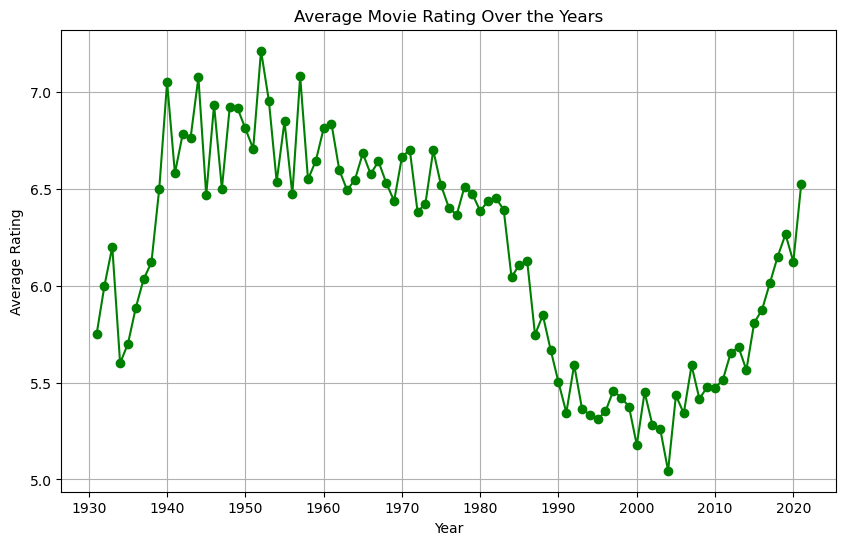

In [103]:
average_rating_per_year = df.groupby('Year')['Rating'].mean()
plt.figure(figsize=(10, 6))
average_rating_per_year.plot(kind='line', marker='o',color='g')
plt.title('Average Movie Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(movies_per_decade.index, [f'{decade}' for decade in movies_per_decade.index])
plt.grid(True)
plt.show()


## 28. Is there a relationship between the number of votes a movie receives and its rating? Provide a scatter plot.

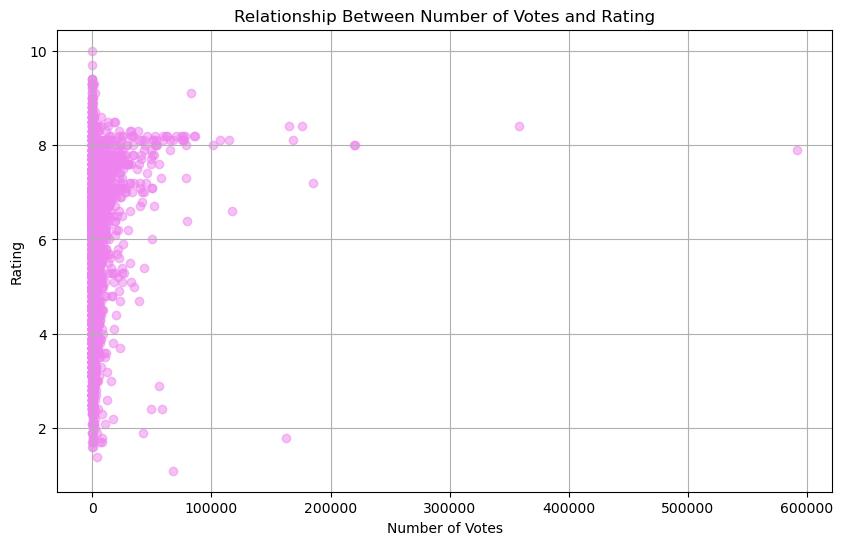

In [105]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Votes'], df['Rating'], alpha=0.5,color='violet')
plt.title('Relationship Between Number of Votes and Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


## 29.Which genres have the highest variability in movie ratings?

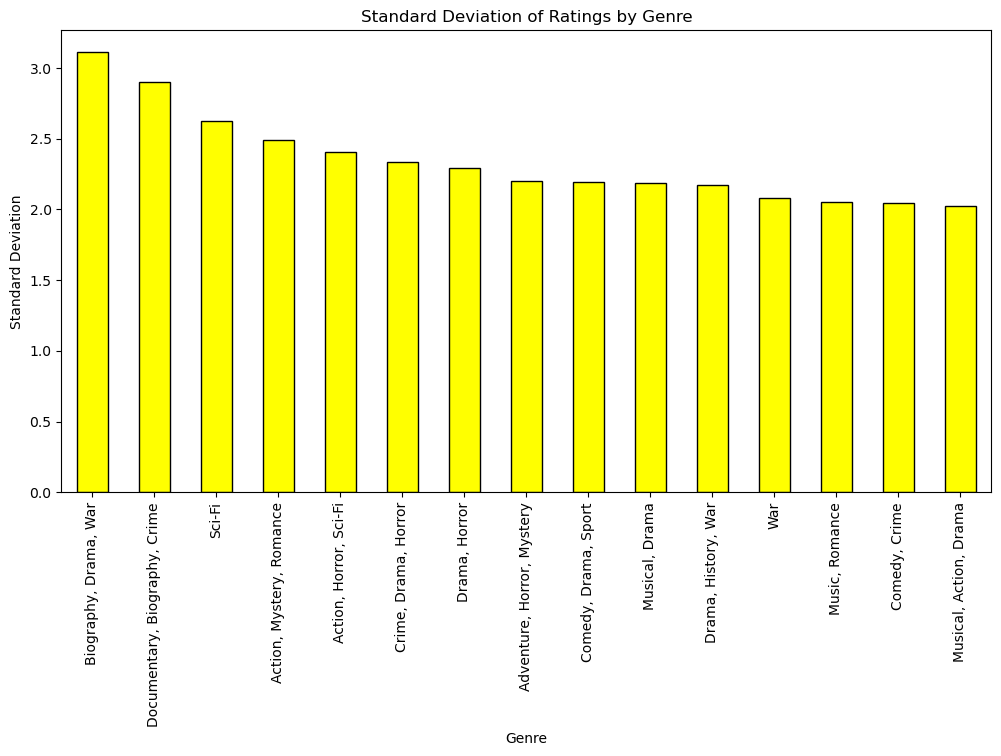

In [107]:
rating_std_per_genre = df.groupby('Genre')['Rating'].std().sort_values(ascending=False)
top_15_genres = rating_std_per_genre.head(15)
# Plot
plt.figure(figsize=(12, 6))
top_15_genres.plot(kind='bar',color='yellow',edgecolor='k')
plt.title('Standard Deviation of Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=90)
plt.show()


## 30.Plot which actor combination (Actor 1 and Actor 2) appears most frequently together?

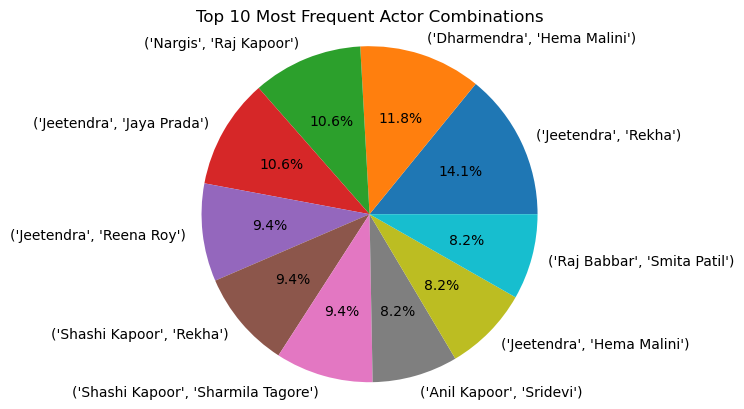

In [109]:
actor_combinations = df.groupby(['Actor 1', 'Actor 2']).size()


actor_combinations = actor_combinations.sort_values(ascending=False)


top_combinations = actor_combinations.head(10)


plt.figure()
plt.pie(top_combinations, labels=top_combinations.index, autopct='%0.1f%%')
plt.title('Top 10 Most Frequent Actor Combinations')
plt.axis('equal')  
plt.show()

## 31 What is the distribution of movies among the top 20 lead actors?



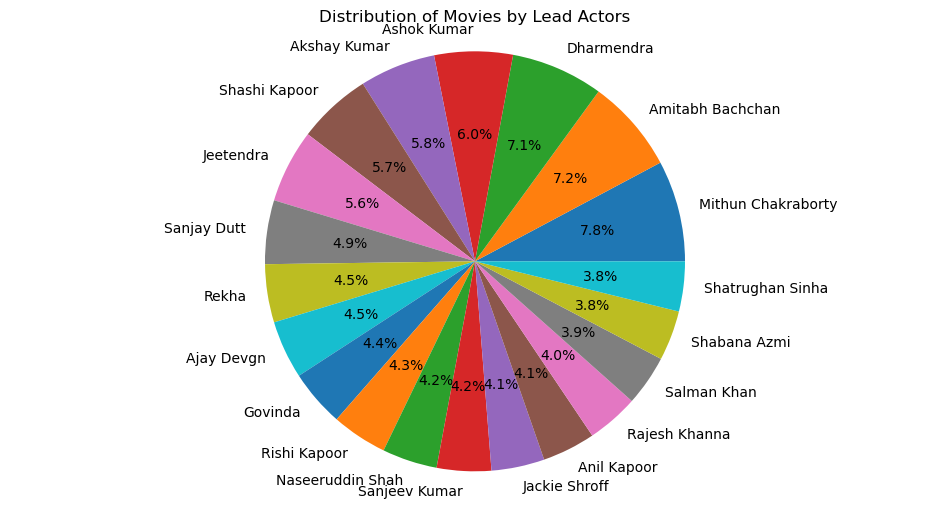

In [111]:
actors_combined = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])

actor_counts = actors_combined.value_counts()

sorted_actor_counts = actor_counts.sort_values(ascending=False)
top_20_actor = sorted_actor_counts.head(20)
# Plot pie chart
plt.figure(figsize=(12, 6))
plt.pie(top_20_actor, labels=top_20_actor.index, autopct='%0.1f%%')
plt.title('Distribution of Movies by Lead Actors')
plt.axis('equal')  
plt.show()

## 32 What is the proportion of movies by genre among the top 40 genres?

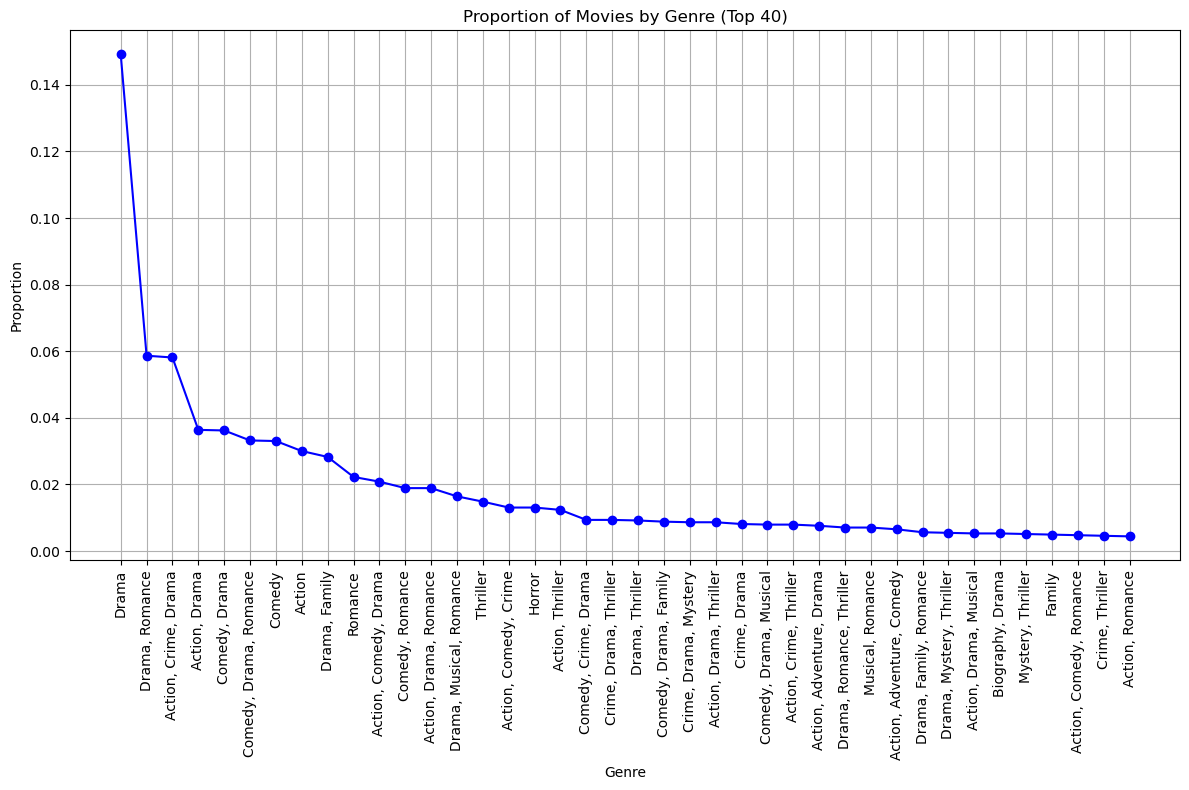

Genre with the highest proportion of movies: Drama (14.91%)
Genre with the lowest proportion of movies: Action, Romance (0.44%)


In [113]:
genre_counts = df['Genre'].value_counts()


genre_proportions = genre_counts / genre_counts.sum()


top_genres = genre_proportions.head(40)


plt.figure(figsize=(12,8))
plt.plot(top_genres.index, top_genres, marker='o', linestyle='-', color='b')
plt.title('Proportion of Movies by Genre (Top 40)')
plt.xlabel('Genre')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


print(f"Genre with the highest proportion of movies: {top_genres.idxmax()} ({top_genres.max():.2%})")
print(f"Genre with the lowest proportion of movies: {top_genres.idxmin()} ({top_genres.min():.2%})")

## 33.How does the duration of movies compare across different ratings?

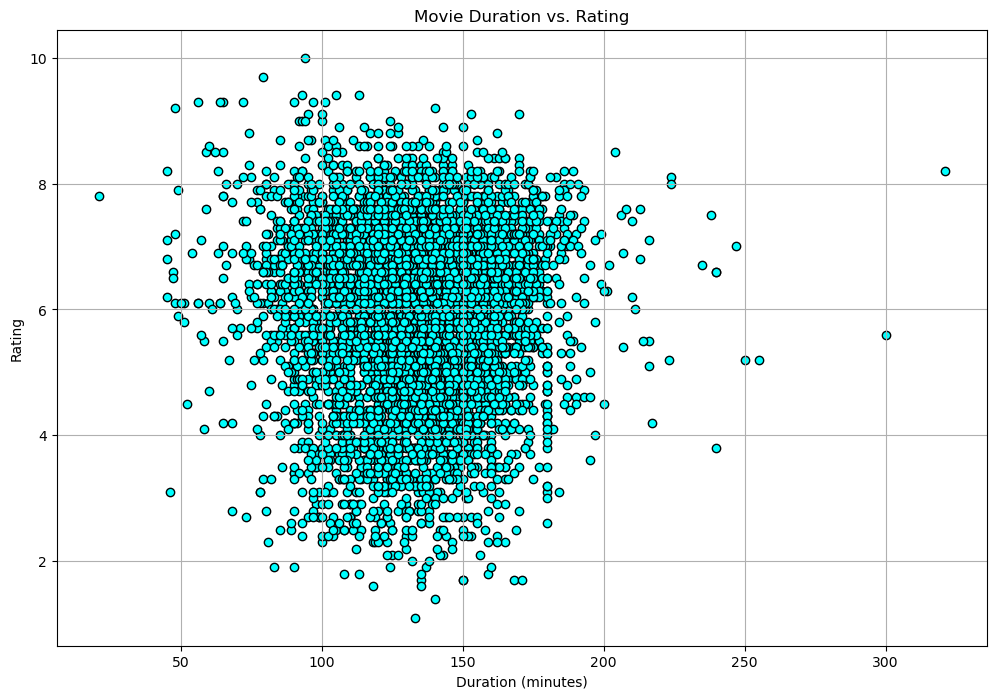

In [116]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Duration'], df['Rating'], color='cyan', edgecolor='black')
plt.title('Movie Duration vs. Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

## 34.What are the top 25 movies by rating and their respective durations?

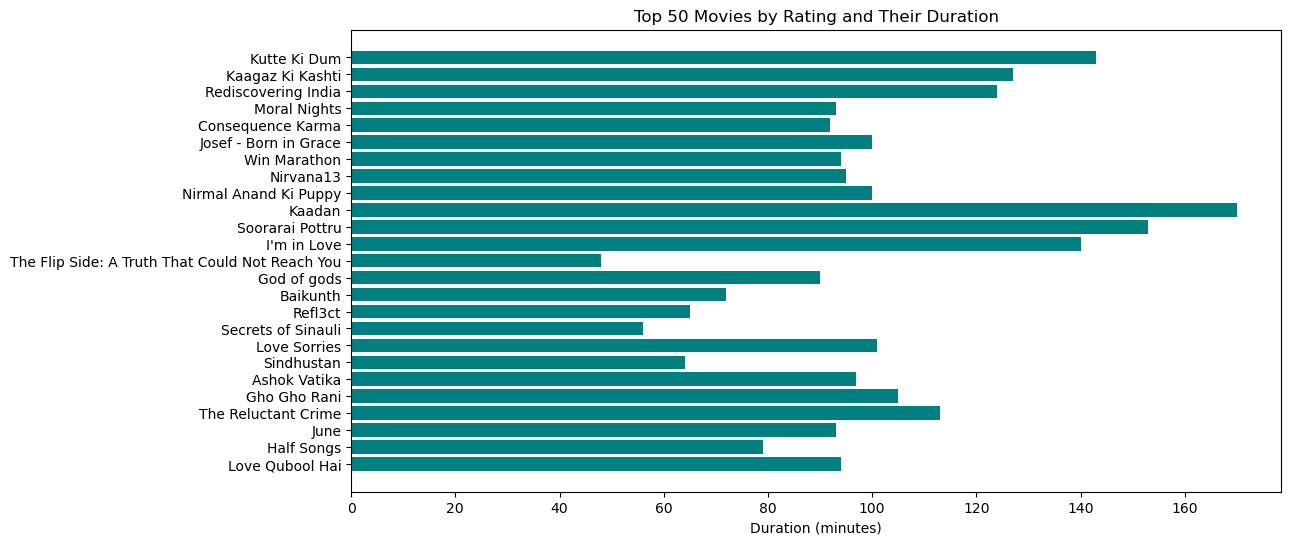

In [118]:
top_25_movies = df.sort_values(by='Rating', ascending=False).head(25)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(top_25_movies['Name'], top_25_movies['Duration'], color='teal')
plt.xlabel('Duration (minutes)')
plt.title('Top 50 Movies by Rating and Their Duration')
plt.show()

## 35 What is the distribution of movie durations by rating ranges?

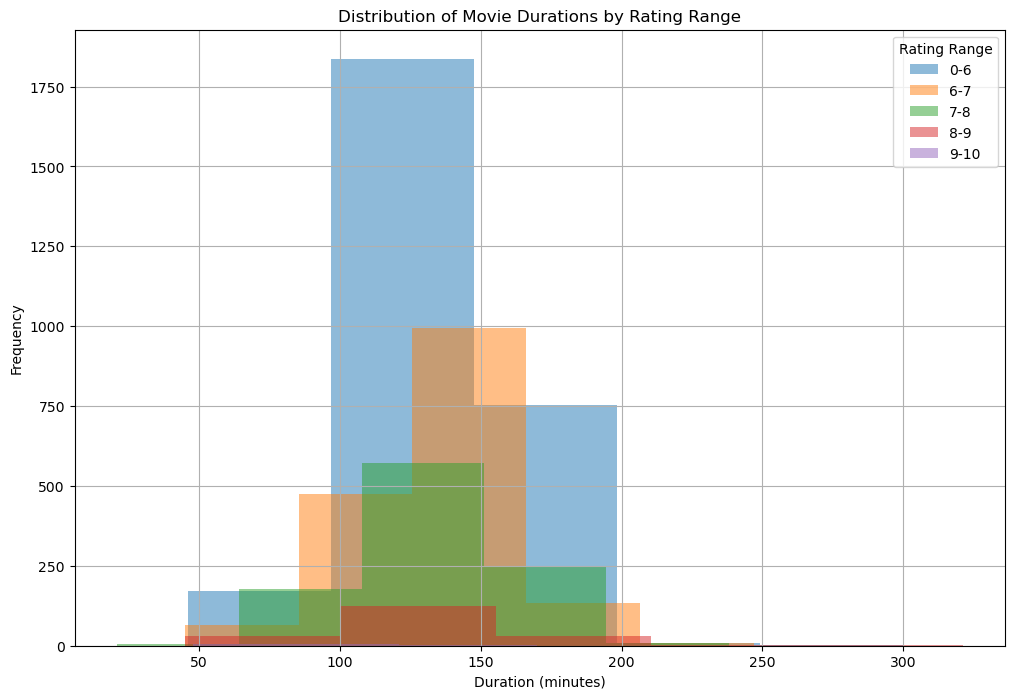

In [120]:
ranges = {
    '0-6': (0, 6),
    '6-7': (6, 7),
    '7-8': (7, 8),
    '8-9': (8, 9),
    '9-10': (9, 10)
}

plt.figure(figsize=(12, 8))
for label, (lower_bound, upper_bound) in ranges.items():
    subset = df[(df['Rating'] > lower_bound) & (df['Rating'] <= upper_bound)]
    plt.hist(subset['Duration'], bins=5, alpha=0.5, label=label)

plt.title('Distribution of Movie Durations by Rating Range')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.legend(title='Rating Range')
plt.grid(True)
plt.show()

## 36. What is the proportion of movies released in different decades?

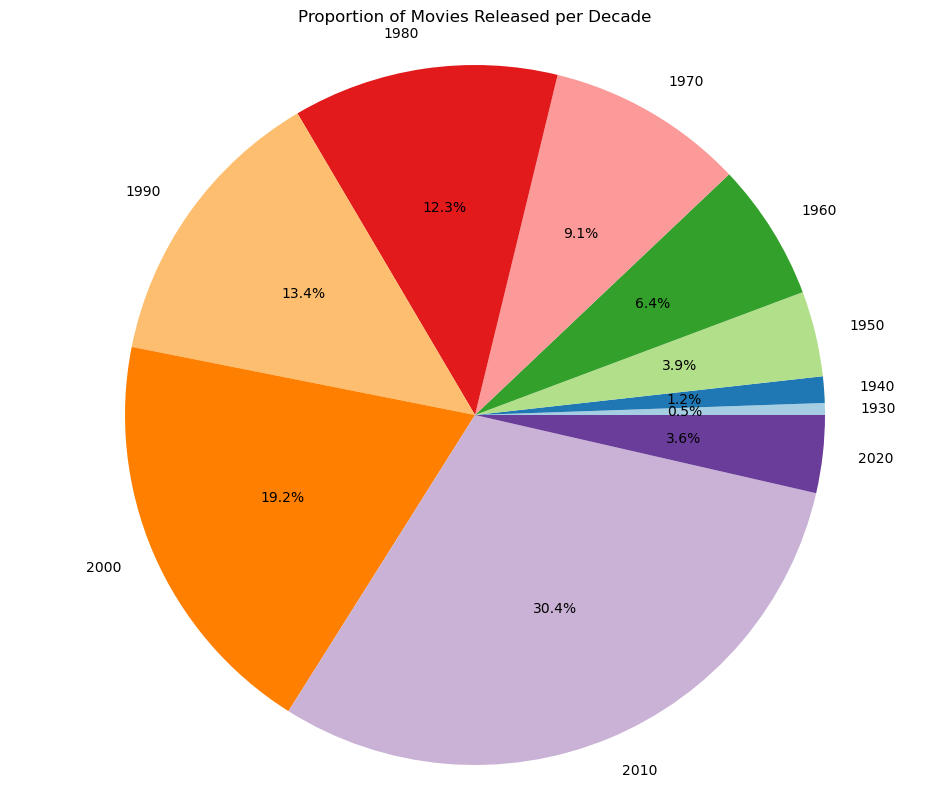

In [122]:
import matplotlib.pyplot as plt
df['Decade'] = (df['Year'] // 10) * 10

decade_counts = df['Decade'].value_counts().sort_index()

total_movies = len(df)
decade_proportions = decade_counts / total_movies

plt.figure(figsize=(12, 10))
plt.pie(decade_proportions, labels=decade_proportions.index, autopct='%0.1f%%' ,colors=plt.cm.Paired(range(len(decade_proportions))))
plt.title('Proportion of Movies Released per Decade')
plt.axis('equal')  
plt.show()

## 37.Which decade saw the highest number of movie releases?

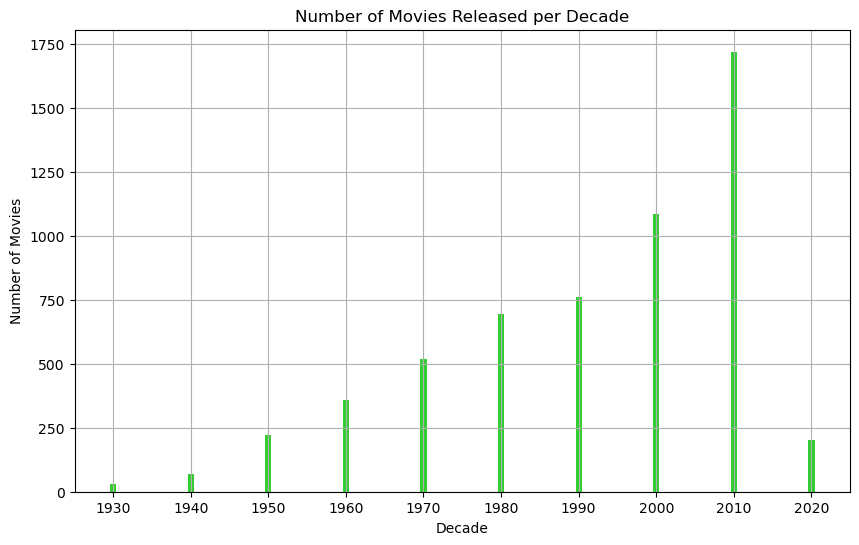

The decade with the highest number of movie releases is 2010s with 1718 movies.


In [125]:
df['Decade'] = (df['Year'] // 10) * 10

decade_counts = df['Decade'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(decade_counts.index, decade_counts, color='limegreen')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released per Decade')
plt.xticks(movies_per_decade.index, [f'{decade}' for decade in movies_per_decade.index])
plt.grid(True)
plt.show()

highest_decade = decade_counts.idxmax()
highest_count = decade_counts.max()
print(f"The decade with the highest number of movie releases is {highest_decade}s with {highest_count} movies.")

## 38.How do movie ratings vary with the duration of the movie

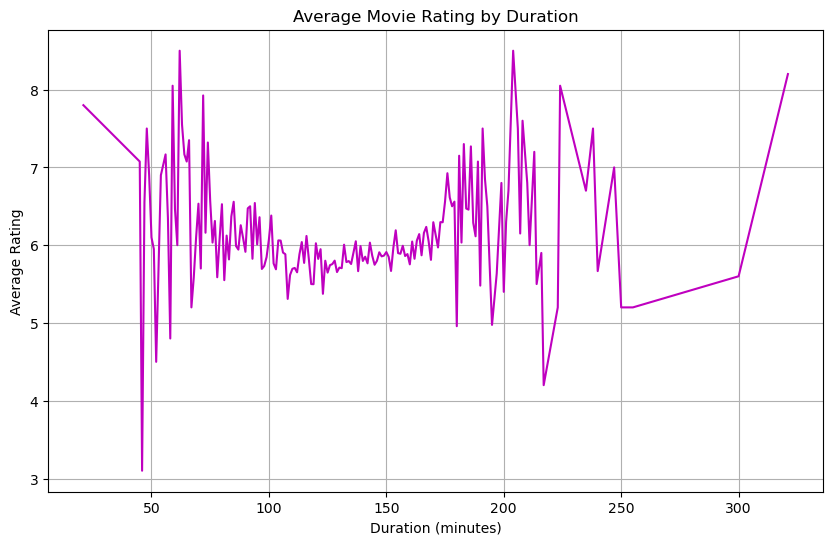

In [127]:

average_ratings = df.groupby('Duration')['Rating'].mean()


plt.figure(figsize=(10, 6))
plt.plot(average_ratings.index, average_ratings, linestyle='-', color='m')
plt.title('Average Movie Rating by Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

## 39.Distribution of movie durations across different genres

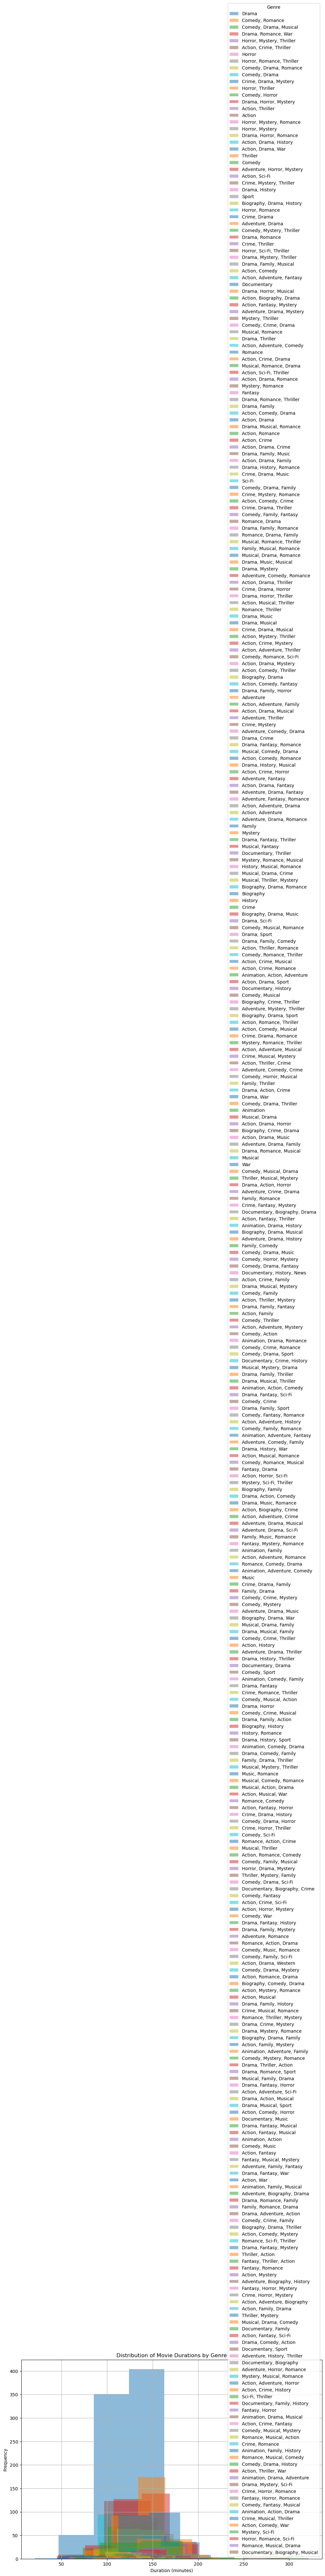

In [129]:
plt.figure(figsize=(12, 8))
for genre in df['Genre'].unique():
    subset = df[df['Genre'] == genre]
    plt.hist(subset['Duration'], bins=5, alpha=0.5, label=genre)

plt.title('Distribution of Movie Durations by Genre')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.legend(title='Genre')
plt.grid(True)
plt.show()


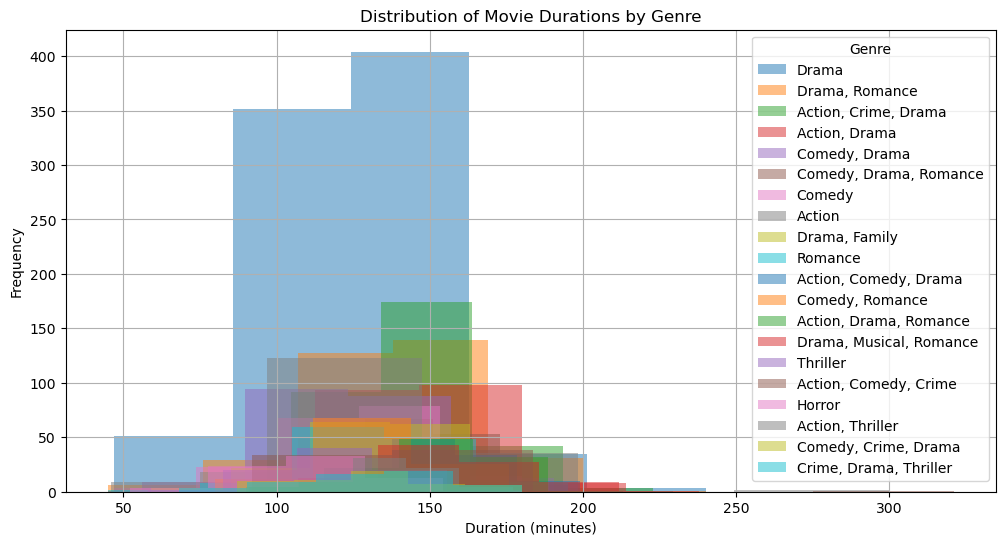

In [130]:
plt.figure(figsize=(12, 6))

# Select a limited number of genres (e.g., top 5 most common genres)
selected_genres = df['Genre'].value_counts().index[:20]

for genre in selected_genres:
    subset = df[df['Genre'] == genre]
    plt.hist(subset['Duration'], bins=5, alpha=0.5, label=genre)

plt.title('Distribution of Movie Durations by Genre')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.legend(title='Genre')
plt.grid(True)
plt.show()


## 40.Which movies have the highest votes for top 30 directors from the dataset?

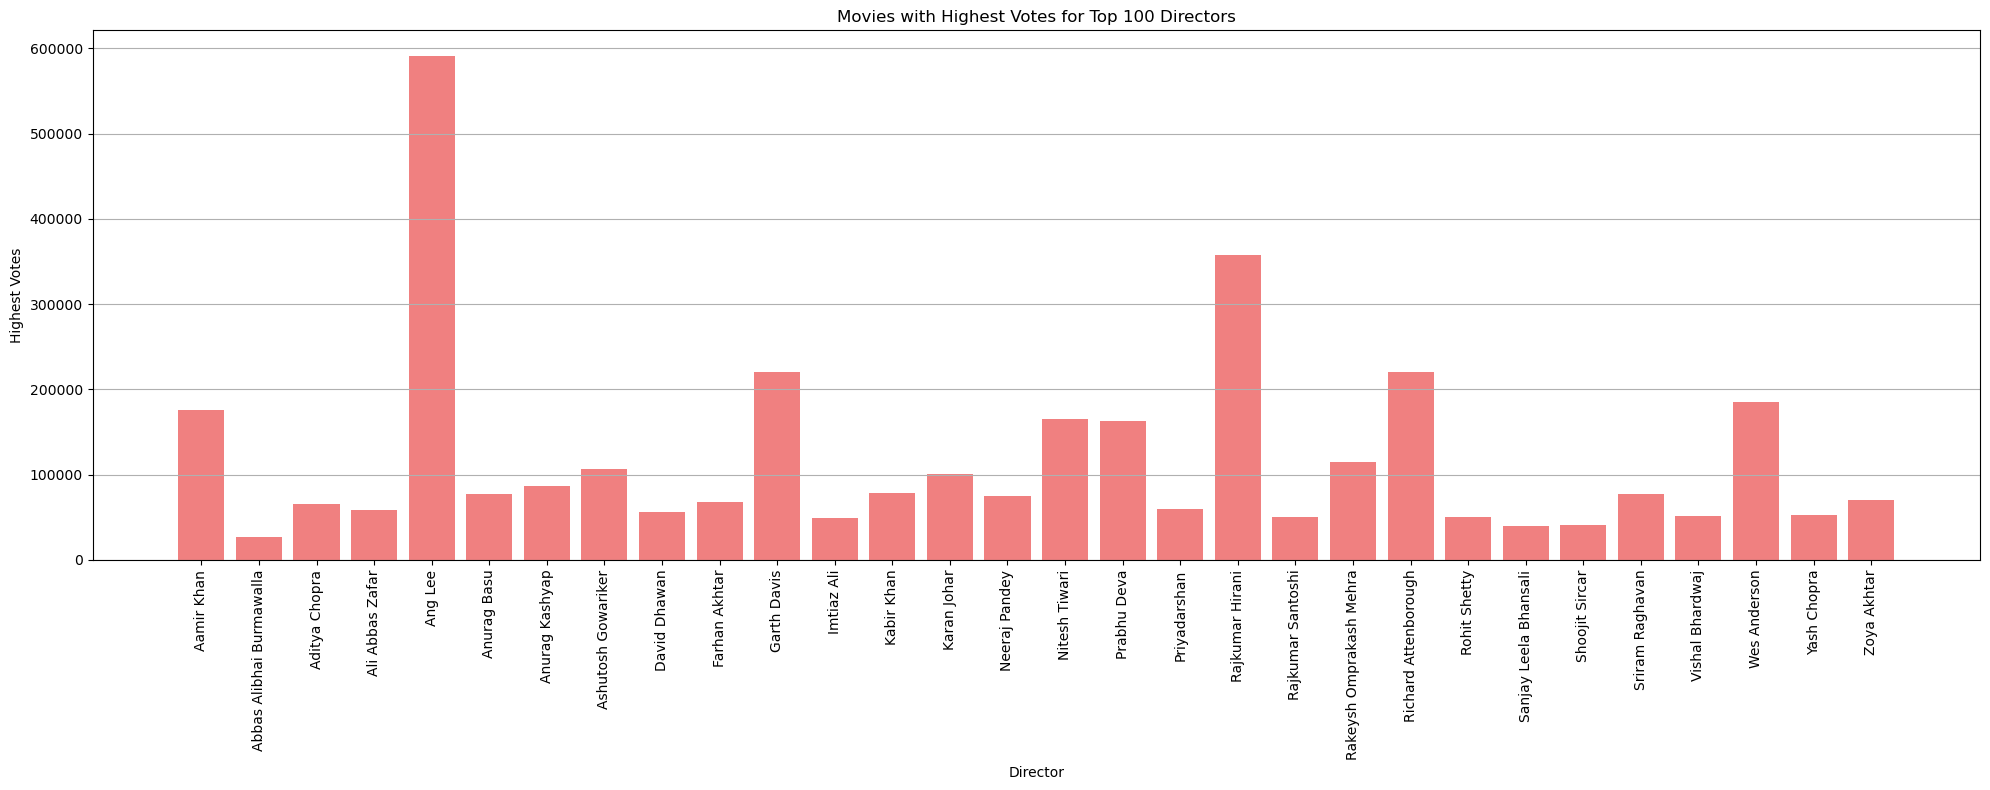

                      Director                               Name   Votes
3092                Aamir Khan                Like Stars on Earth  175810
626   Abbas Alibhai Burmawalla                           Baazigar   26583
1490             Aditya Chopra        Dilwale Dulhania Le Jayenge   65134
1983           Ali Abbas Zafar                             Gunday   58144
3088                   Ang Lee                         Life of Pi  591417
741                Anurag Basu                             Barfi!   77377
1839            Anurag Kashyap                 Gangs of Wasseypur   86355
3020        Ashutosh Gowariker  Lagaan: Once Upon a Time in India  107234
1214              David Dhawan                       Coolie No. 1   56232
1438             Farhan Akhtar                     Dil Chahta Hai   68138
3094               Garth Davis                               Lion  220526
2408                Imtiaz Ali                         Jab We Met   49012
696                 Kabir Khan        

In [132]:
total_votes_by_director = df.groupby('Director')['Votes'].sum()

sorted_directors = total_votes_by_director.sort_values(ascending=False).head(30)

top_30_directors = sorted_directors.index

df_top_30 = df[df['Director'].isin(top_30_directors)]

highest_voted_movies_director = df_top_30.loc[df_top_30.groupby('Director')['Votes'].idxmax()]

# Plotting
plt.figure(figsize=(20, 8))
plt.bar(highest_voted_movies_director['Director'], highest_voted_movies_director['Votes'], color='lightcoral')
plt.xlabel('Director')
plt.ylabel('Highest Votes')
plt.title('Movies with Highest Votes for Top 100 Directors')
plt.xticks(rotation=90) 
plt.grid(axis='y')
plt.tight_layout()  
plt.show()

print(highest_voted_movies_director[['Director', 'Name', 'Votes']])

## 41.Which among top 20 genre has the most consistent ratings (lowest standard deviation)?

Top 20 genres with the most consistent ratings (lowest standard deviations):
Genre
Comedy, Mystery                 0.000000
Mystery, Romance                0.000000
Crime, Mystery, Romance         0.070711
Biography, Drama, Musical       0.070711
Thriller, Mystery               0.070711
Adventure, Crime, Drama         0.141421
Comedy, War                     0.141421
Drama, Family, Action           0.212132
Drama, Sci-Fi                   0.212132
Drama, Action, Crime            0.212132
Crime, Romance                  0.282843
Animation, Adventure, Comedy    0.282843
Comedy, Mystery, Romance        0.282843
Comedy, Family, Romance         0.282843
Family, Musical, Romance        0.336650
Drama, Adventure, Action        0.353553
Adventure, Family, Fantasy      0.353553
Drama, Musical, Family          0.416333
Sport                           0.424264
Drama, Romance, Family          0.424264
Name: Rating, dtype: float64


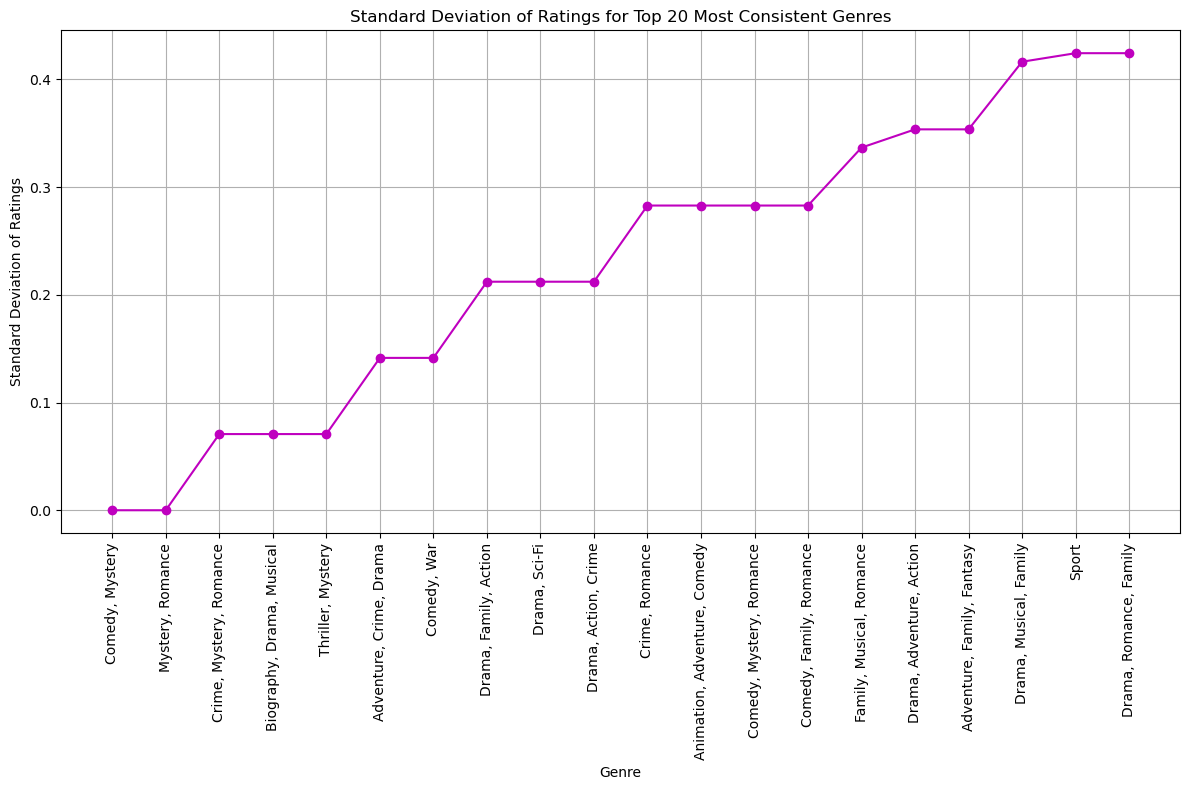

In [136]:
if 'Genre' in df.columns and 'Rating' in df.columns:
    genre_rating_std = df.groupby('Genre')['Rating'].std()

    sorted_genre_std = genre_rating_std.sort_values()

    top_100_genres = sorted_genre_std.head(20)

    print("Top 20 genres with the most consistent ratings (lowest standard deviations):")
    print(top_100_genres)

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.plot(top_100_genres.index, top_100_genres.values, marker='o', linestyle='-', color='m')
    plt.xlabel('Genre')
    plt.ylabel('Standard Deviation of Ratings')
    plt.title('Standard Deviation of Ratings for Top 20 Most Consistent Genres')
    plt.xticks(rotation=90)  
    plt.grid(True)
    plt.tight_layout()  
    plt.show()
else:
    print("The required columns 'Genre' and 'Rating' are not present in the dataset.")

## 42.How many movies feature Aishwarya Rai Bachchan, and what is her average rating across these movies?

In [138]:
aishwarya_movies = df[
    (df['Actor 1'] == 'Aishwarya Rai Bachchan') | 
    (df['Actor 2'] == 'Aishwarya Rai Bachchan') | 
    (df['Actor 3'] == 'Aishwarya Rai Bachchan')
]

num_movies = aishwarya_movies.shape[0]
average_rating = aishwarya_movies['Rating'].mean()

print(f"Number of movies featuring Aishwarya Rai Bachchan: {num_movies}")
print(f"Average rating of movies featuring Aishwarya Rai Bachchan: {average_rating:.2f}")

Number of movies featuring Aishwarya Rai Bachchan: 27
Average rating of movies featuring Aishwarya Rai Bachchan: 5.95


## 43.Analyze the trend in movie duration over the years. Is there a noticeable increase or decrease?

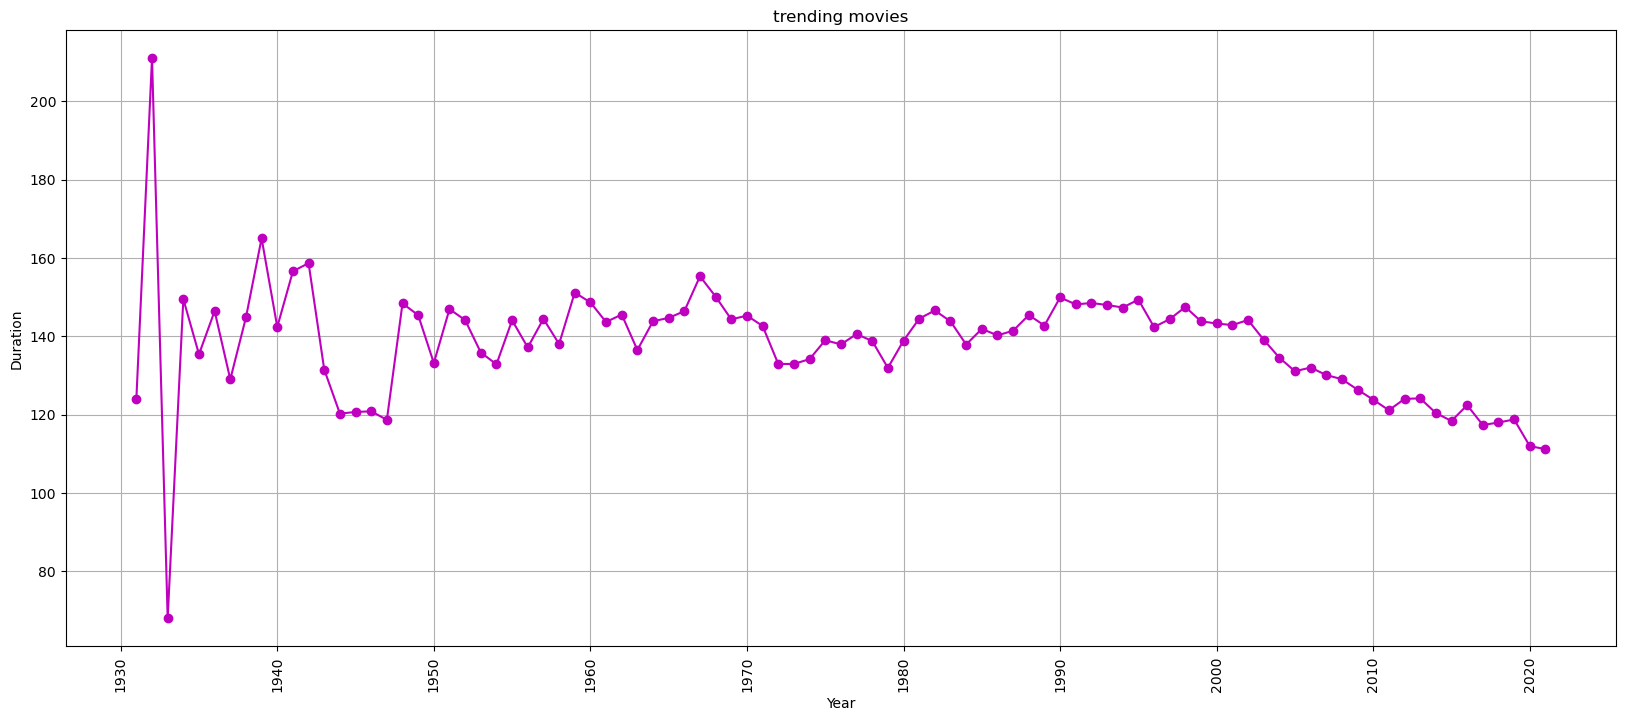

In [140]:
trending_movies=df[['Year','Duration']]
trending_movies=trending_movies.sort_values(by='Year',axis=0)
trending_movies.reset_index(drop=True,inplace=True)
trending_movies.Year.value_counts()
trending=trending_movies.groupby('Year')['Duration'].mean()
trending
plt.figure(figsize=(20, 8))
plt.plot(trending.index, trending.values, marker='o', linestyle='-', color='m')
plt.xlabel('Year')
plt.ylabel('Duration')
plt.title('trending movies')
plt.xticks(rotation=90)  
plt.xticks(movies_per_decade.index, [f'{decade}' for decade in movies_per_decade.index])
plt.grid(True)
plt.show()

## 44.How does the number of votes differ between the "Horror" genre and the "Romance" genre?

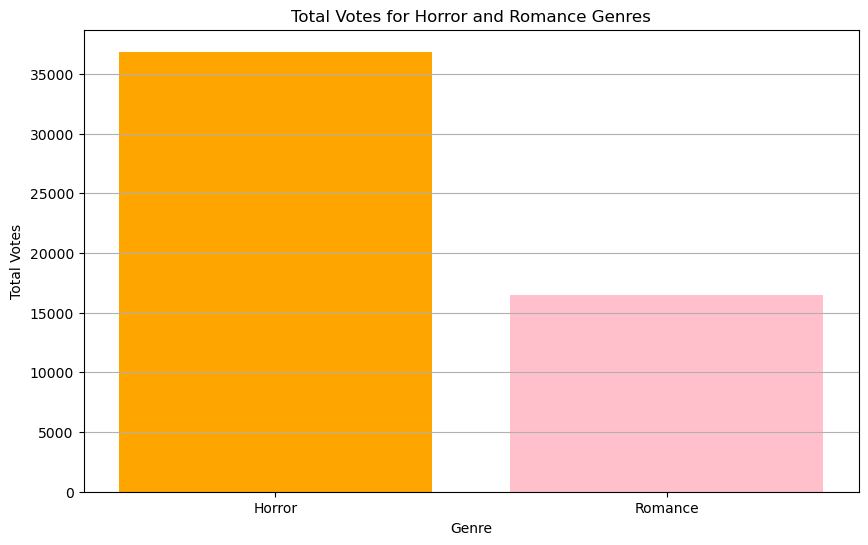

Total votes for Horror genre: 36867
Total votes for Romance genre: 16486


In [142]:
# Calculate the total votes for each genre
horror_votes = df[df['Genre'] == 'Horror']['Votes'].sum()
romance_votes = df[df['Genre'] == 'Romance']['Votes'].sum()

# Create a DataFrame for the vote data
vote_data = pd.DataFrame({
    'Genre': ['Horror', 'Romance'],
    'Total Votes': [horror_votes, romance_votes]
})

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(vote_data['Genre'], vote_data['Total Votes'], color=['orange', 'pink'])
plt.xlabel('Genre')
plt.ylabel('Total Votes')
plt.title('Total Votes for Horror and Romance Genres')
plt.grid(axis='y')
plt.show()

# Print the results
print(f"Total votes for Horror genre: {horror_votes}")
print(f"Total votes for Romance genre: {romance_votes}")


## 45.Analyze the career trajectory of Rishi Kapoor and Deepika Padukone by comparing his average movie rating in the first half of his career versus the second half.

Average movie rating in the first half of Rishi Kapoor's career: 6.40
Average movie rating in the second half of Rishi Kapoor's career: 5.47


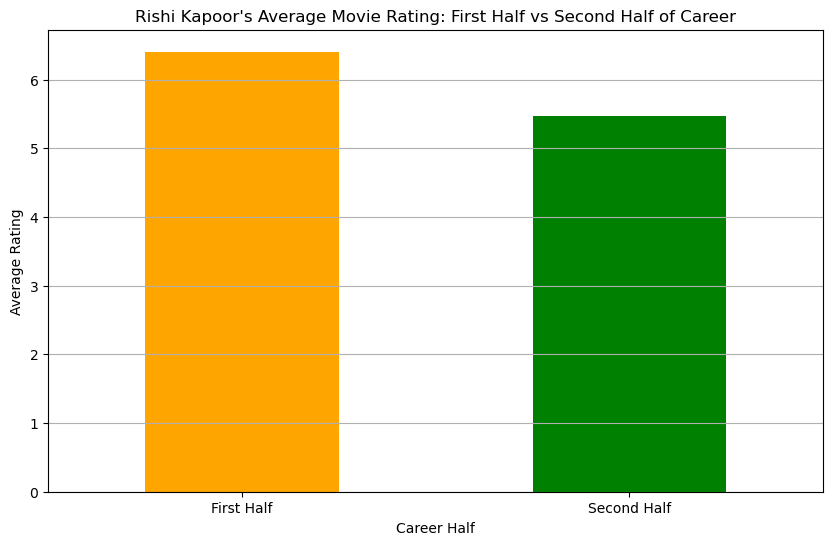

In [145]:

if 'Actor 1' in df.columns and 'Actor 2' in df.columns and 'Actor 3' in df.columns and 'Year' in df.columns and 'Rating' in df.columns:
    rishi_movies = df[
        (df['Actor 1'] == 'Rishi Kapoor') | 
        (df['Actor 2'] == 'Rishi Kapoor') | 
        (df['Actor 3'] == 'Rishi Kapoor')
    ]
 
    rishi_movies = rishi_movies.sort_values(by='Year')

    median_year = rishi_movies['Year'].median()

    first_half = rishi_movies[rishi_movies['Year'] <= median_year]
    second_half = rishi_movies[rishi_movies['Year'] > median_year]

    first_half_avg_rating = first_half['Rating'].mean()
    second_half_avg_rating = second_half['Rating'].mean()

    print(f"Average movie rating in the first half of Rishi Kapoor's career: {first_half_avg_rating:.2f}")
    print(f"Average movie rating in the second half of Rishi Kapoor's career: {second_half_avg_rating:.2f}")

    data = pd.DataFrame({
        'Career Half': ['First Half', 'Second Half'],
        'Average Rating': [first_half_avg_rating, second_half_avg_rating]
    })

    data.plot(kind='bar', x='Career Half', y='Average Rating', color=['orange', 'green'], legend=False, figsize=(10, 6))
    plt.title("Rishi Kapoor's Average Movie Rating: First Half vs Second Half of Career")
    plt.ylabel('Average Rating')
    plt.xlabel('Career Half')
    plt.grid(axis='y')
    plt.xticks(rotation=0)
    plt.show()
else:
    print("The required columns are not present in the dataset.")

Average movie rating in the first half of Deepika Padukone's career: 5.89
Average movie rating in the second half of Deepika Padukone's career: 6.32


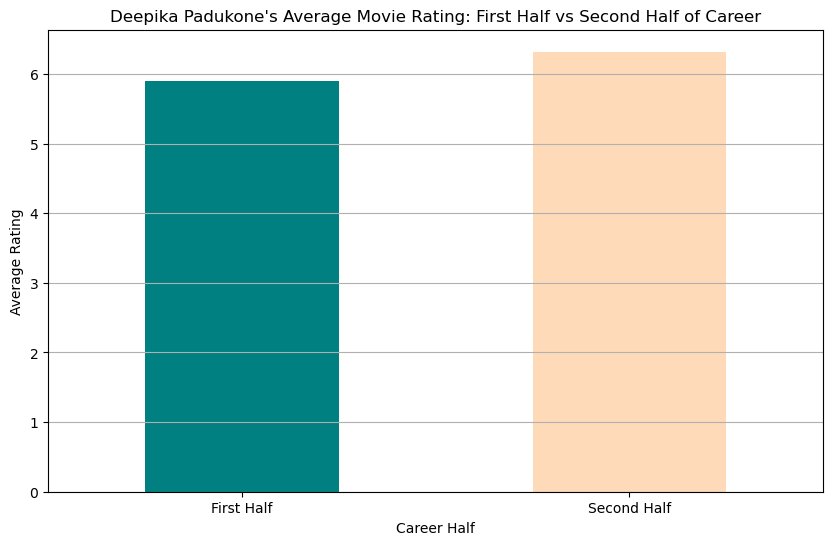

In [146]:
if 'Actor 1' in df.columns and 'Actor 2' in df.columns and 'Actor 3' in df.columns and 'Year' in df.columns and 'Rating' in df.columns:
    rishi_movies = df[
        (df['Actor 1'] == 'Deepika Padukone') | 
        (df['Actor 2'] == 'Deepika Padukone') | 
        (df['Actor 3'] == 'Deepika Padukone')
                    ]
 
    rishi_movies = rishi_movies.sort_values(by='Year')

    median_year = rishi_movies['Year'].median()

    first_half = rishi_movies[rishi_movies['Year'] <= median_year]
    second_half = rishi_movies[rishi_movies['Year'] > median_year]

    first_half_avg_rating = first_half['Rating'].mean()
    second_half_avg_rating = second_half['Rating'].mean()

    print(f"Average movie rating in the first half of Deepika Padukone's career: {first_half_avg_rating:.2f}")
    print(f"Average movie rating in the second half of Deepika Padukone's career: {second_half_avg_rating:.2f}")

    data = pd.DataFrame({
        'Career Half': ['First Half', 'Second Half'],
        'Average Rating': [first_half_avg_rating, second_half_avg_rating]
    })

    data.plot(kind='bar', x='Career Half', y='Average Rating', color=['teal', 'peachpuff'], legend=False, figsize=(10,6))
    plt.title("Deepika Padukone's Average Movie Rating: First Half vs Second Half of Career")
    plt.ylabel('Average Rating')
    plt.xlabel('Career Half')
    plt.grid(axis='y')
    plt.xticks(rotation=0)
    plt.show()
else:
    print("The required columns are not present in the dataset.")

In [147]:
num_stat=df.describe(exclude='object')
num_stat

,Year,Duration,Rating,Votes,Decade
count,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,133.439124,5.898533,2697.649585,1991.588620
std,19.741839,25.319939,1.381165,13651.503584,19.742144
min,1931.000000,21.000000,1.100000,5.000000,1930.000000
25%,1983.000000,119.000000,5.000000,30.000000,1980.000000
50%,2002.000000,135.000000,6.100000,131.000000,2000.000000
75%,2013.000000,150.000000,6.900000,922.500000,2010.000000
max,2021.000000,321.000000,10.000000,591417.000000,2020.000000


In [149]:
cat_stat=df.describe(include='object')
cat_stat

,Name,Genre,Director,Actor 1,Actor 2,Actor 3
count,5659,5659,5659,5659,5659,5659
unique,5385,376,2431,1960,2321,2556
top,Baazi,Drama,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,844,41,104,52,57


## 46. How has the popularity of different genres changed over time (based on release year)?

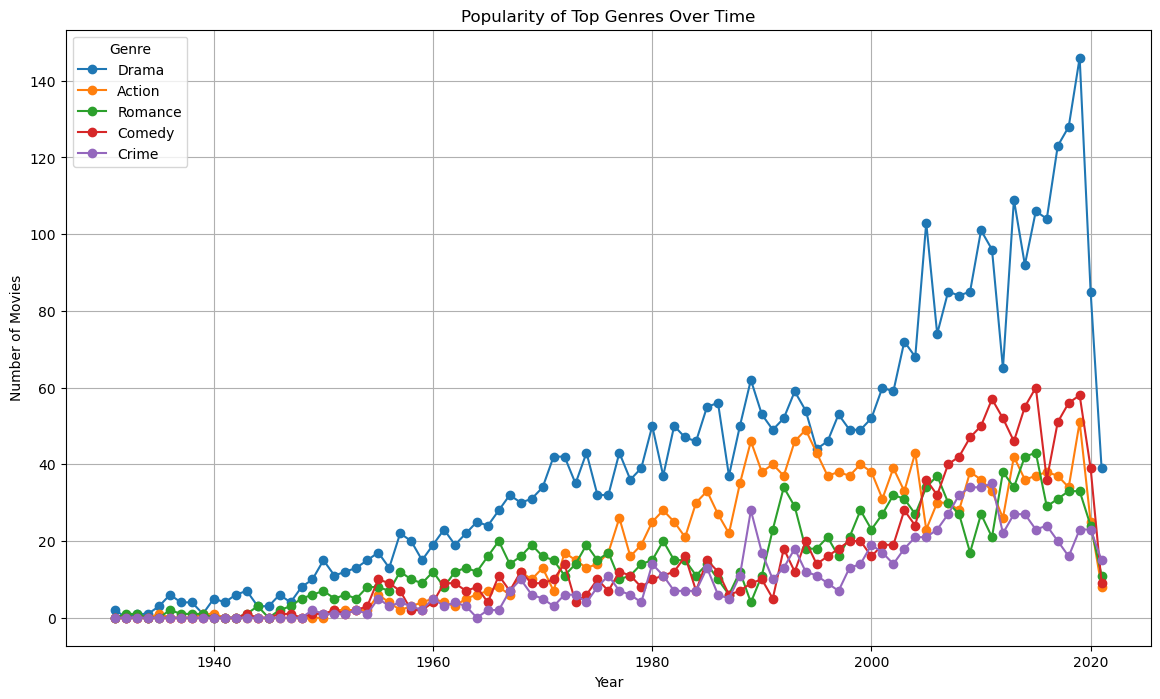

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('movies.csv')

# Explode genres into separate rows
exploded_df = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre')

# Group by year and genre to count the number of movies per genre per year
genre_trend = exploded_df.groupby(['Year', 'Genre']).size().unstack(fill_value=0)

# Select the top genres
top_genres = genre_trend.sum().sort_values(ascending=False).head(5).index.tolist()

# Plotting the trend for the top genres over time
genre_trend[top_genres].plot(figsize=(14, 8), marker='o')

plt.title('Popularity of Top Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre')
plt.grid(True)
plt.show()


In [153]:
import pandas as pd

# Load the dataset
df = pd.read_csv('movies.csv')

# Assuming the dataset has columns 'Director' and 'Genre'
# Split genres if they are in a single string separated by '|'
df['Genre'] = df['Genre'].str.split('|')

# Explode the dataframe so each genre has its own row
df_exploded = df.explode('Genre')

# Group by Genre and Director, then count occurrences
genre_director_count = df_exploded.groupby(['Genre', 'Director']).size().reset_index(name='Count')

# Sort the data by Genre and Count (descending) to get the top director in each genre
genre_director_count = genre_director_count.sort_values(['Genre', 'Count'], ascending=[True, False])

# Find the director with the maximum count for each genre
top_directors = genre_director_count.loc[genre_director_count.groupby('Genre')['Count'].idxmax()]

# Display the result
top_directors = top_directors[['Genre', 'Director', 'Count']]
print(top_directors)


                             Genre       Director  Count
52                          Action     Kanti Shah      7
137              Action, Adventure     Homi Wadia      2
148   Action, Adventure, Biography     Rahul Bose      1
158      Action, Adventure, Comedy    Indra Kumar      2
190       Action, Adventure, Crime   Subhash Ghai      2
...                            ...            ...    ...
4846              Thriller, Action   Ajay Kashyap      1
4847    Thriller, Musical, Mystery      Biren Nag      1
4848             Thriller, Mystery  Ravindra Dave      1
4850     Thriller, Mystery, Family    Jambulingam      1
4851                           War     Ashok Kaul      1

[376 rows x 3 columns]


  ##  47.Who are the top directors associated with specific genres, and how many movies have they directed in the top 25 genres

                          Genre            Director  Count
3319                      Drama       Shyam Benegal     13
688        Action, Crime, Drama     Ram Gopal Varma     11
2136     Comedy, Drama, Romance        David Dhawan      7
3523              Drama, Family         Satyen Bose      7
52                       Action          Kanti Shah      7
400       Action, Comedy, Drama        David Dhawan      6
927               Action, Drama   Rama Rao Tatineni      6
4376                     Horror          Kanti Shah      5
3907             Drama, Romance            Asit Sen      5
339       Action, Comedy, Crime        David Dhawan      5
495     Action, Comedy, Romance        David Dhawan      5
1916              Comedy, Drama        Priyadarshan      4
2364            Comedy, Romance        David Dhawan      4
1650                     Comedy        Manoj Sharma      4
1080     Action, Drama, Romance        Harry Baweja      4
3800    Drama, Musical, Romance          Raj Kapoor     

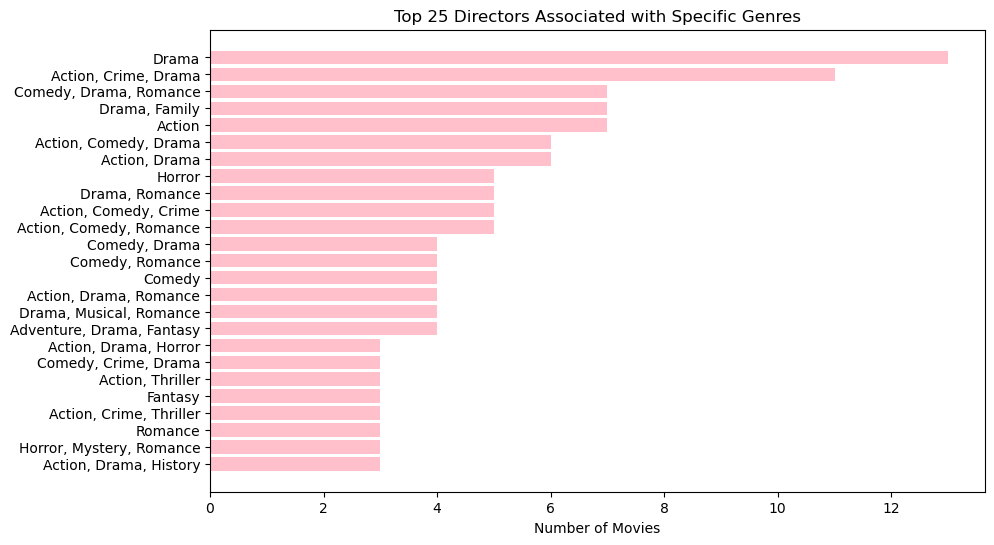

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('movies.csv')

# Assuming the dataset has columns 'Director' and 'Genre'
# Split genres if they are in a single string separated by '|'
df['Genre'] = df['Genre'].str.split('|')

# Explode the dataframe so each genre has its own row
df_exploded = df.explode('Genre')

# Group by Genre and Director, then count occurrences
genre_director_count = df_exploded.groupby(['Genre', 'Director']).size().reset_index(name='Count')

# Sort the data by Genre and Count (descending) to get the top director in each genre
genre_director_count = genre_director_count.sort_values(['Genre', 'Count'], ascending=[True, False])

# Find the director with the maximum count for each genre
top_directors = genre_director_count.loc[genre_director_count.groupby('Genre')['Count'].idxmax()]

# Limit to top n genres based on the number of movies directed by top directors
n = 25  # Change this value to limit the number of genres in the plot
top_genres = top_directors.sort_values(by='Count', ascending=False).head(n)

# Display the result
print(top_genres)

# Plotting the bar plot with limited genres
plt.figure(figsize=(10, 6))
plt.barh(top_genres['Genre'], top_genres['Count'], color='pink')
plt.xlabel('Number of Movies')
plt.title(f'Top {n} Directors Associated with Specific Genres')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()
